In [44]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from ydata_profiling import ProfileReport
from quickda.clean_data import *

# Leer archivo csv
servicios = pd.read_csv('./data/Servicios por departamento.csv' , low_memory=False, encoding_errors='ignore')
servicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18301 entries, 0 to 18300
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      18301 non-null  int64  
 1   Tipo                     18301 non-null  object 
 2   Departamento_residencia  18301 non-null  object 
 3   Todas las causas         18300 non-null  object 
 4   Total                    18300 non-null  float64
 5   Hombres                  15141 non-null  float64
 6   Mujeres                  18009 non-null  float64
 7   Ignorado                 3934 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [27]:
servicios

,Año,Tipo,Departamento_residencia,Todas las causas,Total,Hombres,Mujeres,Ignorado
0,2009,Internos,Guatemala,Nacidos vivos según lugar de nacimiento,5475.0,2747.0,2671.0,57.0
1,2009,Internos,Guatemala,Diarrea y gastroenteritis de presunto origen i...,3948.0,1785.0,2157.0,6.0
2,2009,Internos,Guatemala,Parto único por cesárea,3136.0,NaN,3136.0,NaN
3,2009,Internos,Guatemala,Parto único espontáneo,2366.0,NaN,2366.0,NaN
4,2009,Internos,Guatemala,Colecistitis,1983.0,537.0,1441.0,5.0
...,...,...,...,...,...,...,...,...
18296,2021,Externos,Jutiapa,Otros trastornos de ansiedad,222.0,55.0,167.0,NaN
18297,2021,Externos,Jutiapa,Rinofaringitis aguda [resfriado común],222.0,122.0,100.0,NaN
18298,2021,Externos,Jutiapa,Disfunción ovárica,197.0,NaN,197.0,NaN
18299,2021,Externos,Jutiapa,"Síntomas, signos y hallazgos anormales clínico...",1433.0,450.0,982.0,1.0


In [28]:
servicios.isnull().any()

Año                        False
Tipo                       False
Departamento_residencia    False
Todas las causas            True
Total                       True
Hombres                     True
Mujeres                     True
Ignorado                    True
dtype: bool

In [29]:
servicios = servicios.fillna(0)

In [32]:
servicios['Total'] = servicios['Total'].astype(int)
servicios['Hombres'] = servicios['Hombres'].astype(int)
servicios['Mujeres'] = servicios['Mujeres'].astype(int)
servicios['Ignorado'] = servicios['Ignorado'].astype(int)

In [33]:
servicios

,Año,Tipo,Departamento_residencia,Todas las causas,Total,Hombres,Mujeres,Ignorado
0,2009,Internos,Guatemala,Nacidos vivos según lugar de nacimiento,5475,2747,2671,57
1,2009,Internos,Guatemala,Diarrea y gastroenteritis de presunto origen i...,3948,1785,2157,6
2,2009,Internos,Guatemala,Parto único por cesárea,3136,0,3136,0
3,2009,Internos,Guatemala,Parto único espontáneo,2366,0,2366,0
4,2009,Internos,Guatemala,Colecistitis,1983,537,1441,5
...,...,...,...,...,...,...,...,...
18296,2021,Externos,Jutiapa,Otros trastornos de ansiedad,222,55,167,0
18297,2021,Externos,Jutiapa,Rinofaringitis aguda [resfriado común],222,122,100,0
18298,2021,Externos,Jutiapa,Disfunción ovárica,197,0,197,0
18299,2021,Externos,Jutiapa,"Síntomas, signos y hallazgos anormales clínico...",1433,450,982,1


In [34]:
profile = ProfileReport(servicios)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

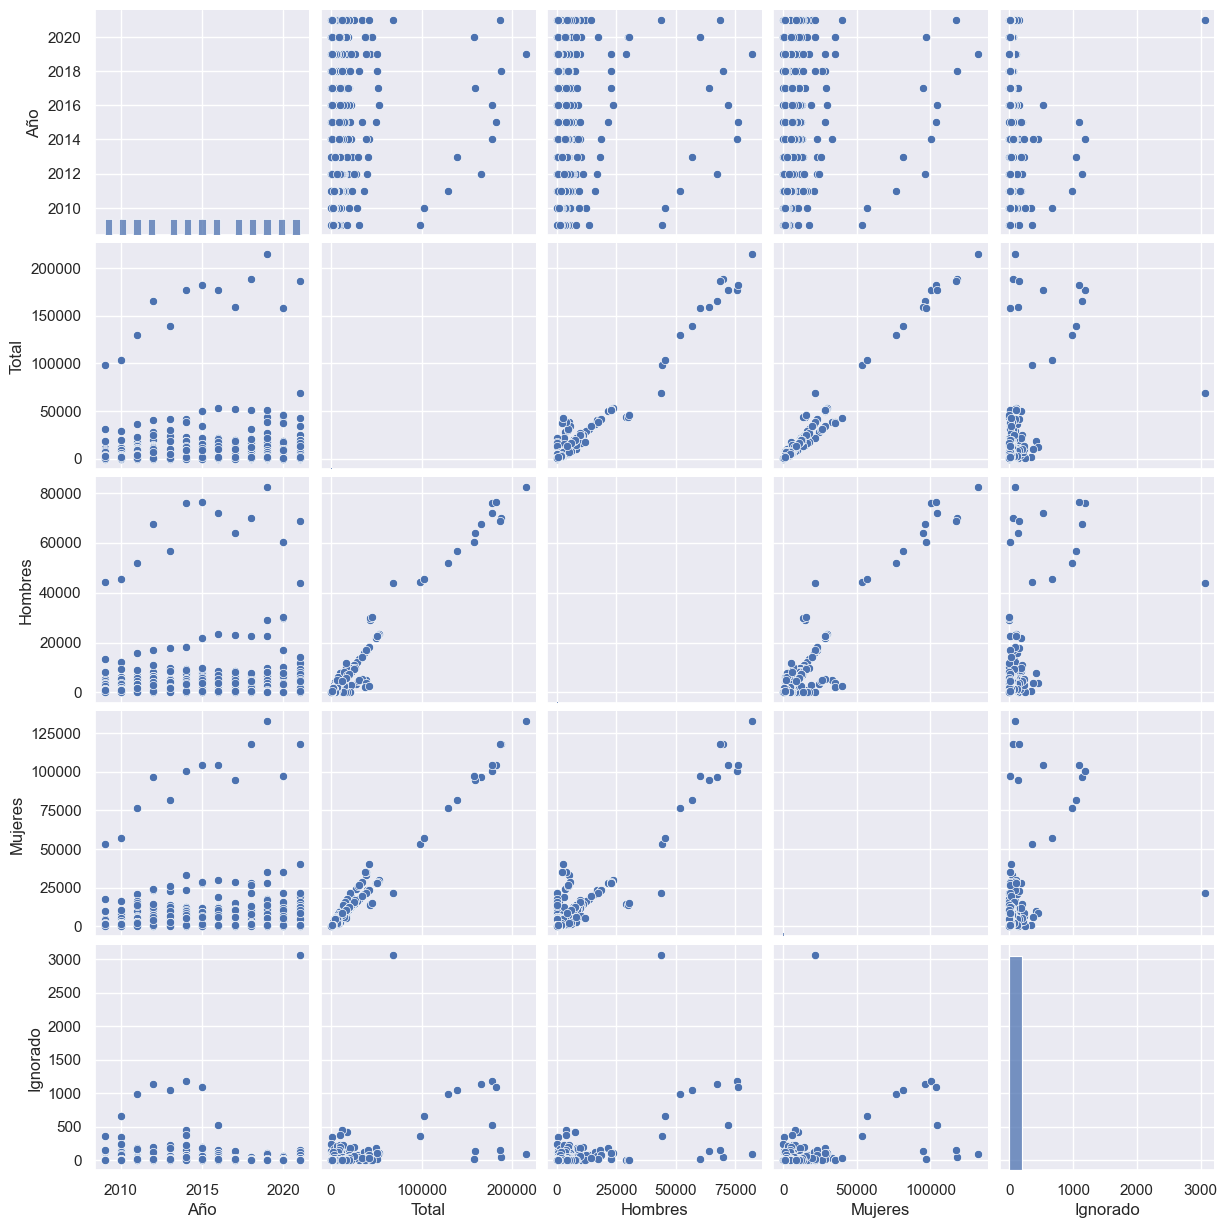

In [38]:
sns.pairplot(servicios)

<AxesSubplot: xlabel='Año', ylabel='Total'>

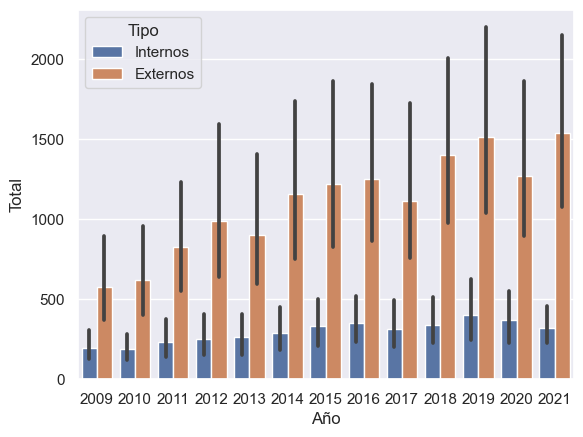

In [40]:
sns.barplot(data = servicios, x = "Año", y = "Total", hue= "Tipo")

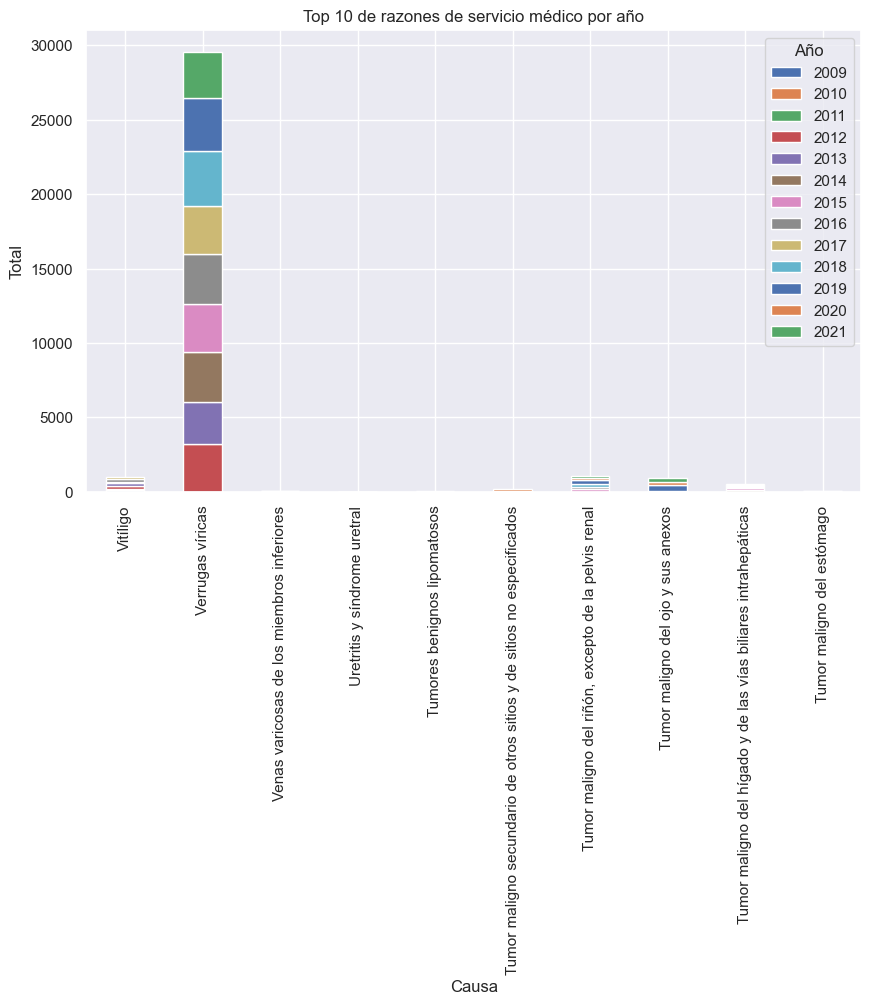

In [60]:
tabla = pd.pivot_table(data = servicios, values='Total', index='Todas las causas', columns='Año', aggfunc='sum')

sorted_table = tabla.sort_values(by='Todas las causas', ascending=False)
top_10 = sorted_table.head(10)

# Graficar los resultados utilizando un gráfico de barras apiladas
top_10.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Causa')
plt.ylabel('Total')
plt.title('Top 10 de razones de servicio médico por año')
plt.show()

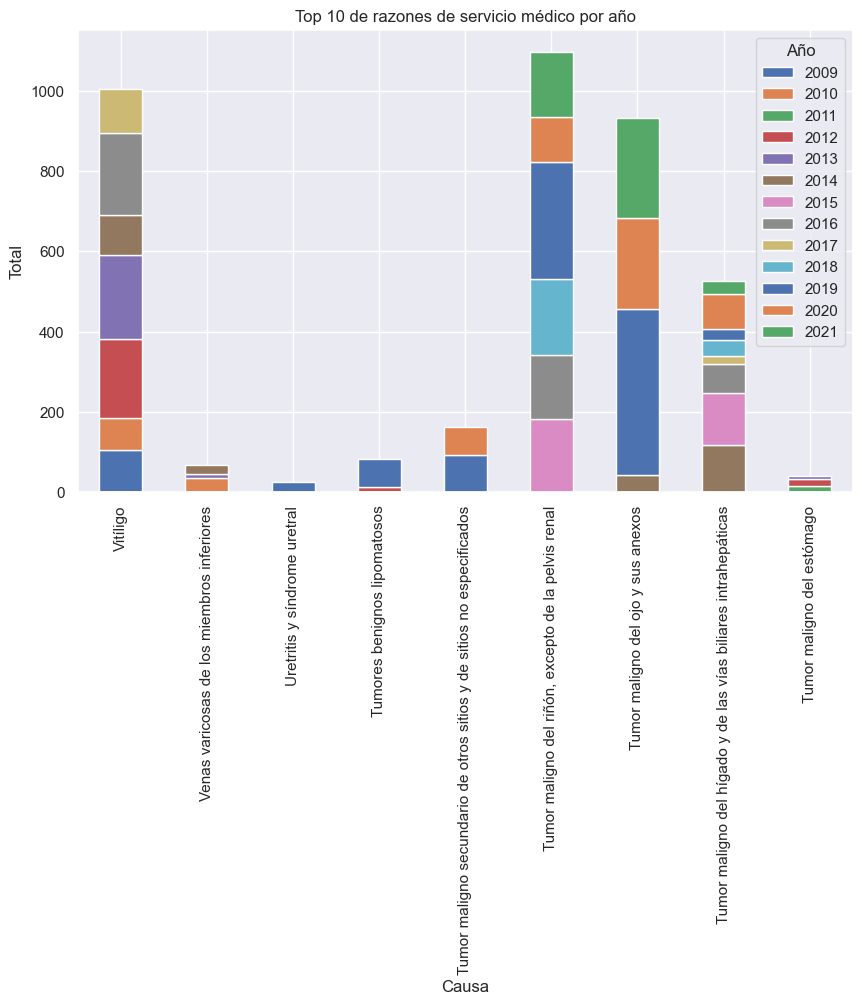

In [62]:
tabla = pd.pivot_table(data = servicios[servicios['Todas las causas'] != 'Verrugas víricas'], values='Total', index='Todas las causas', columns='Año', aggfunc='sum')

sorted_table = tabla.sort_values(by='Todas las causas', ascending=False)
top_10 = sorted_table.head(9)

# Graficar los resultados utilizando un gráfico de barras apiladas
top_10.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Causa')
plt.ylabel('Total')
plt.title('Top 10 de razones de servicio médico por año')
plt.show()

<AxesSubplot: xlabel='Año', ylabel='Total'>

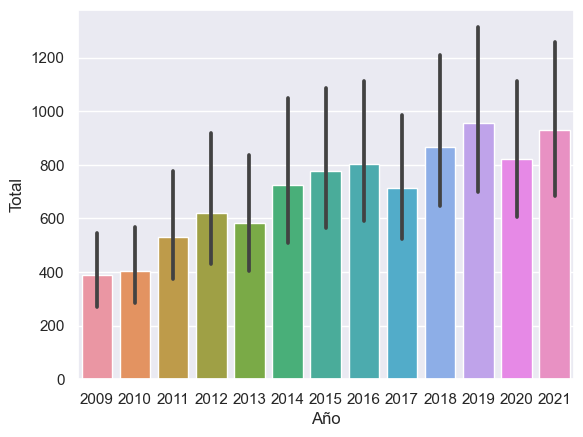

In [54]:
sns.barplot(data = servicios, x = "Año" , y = "Total" )

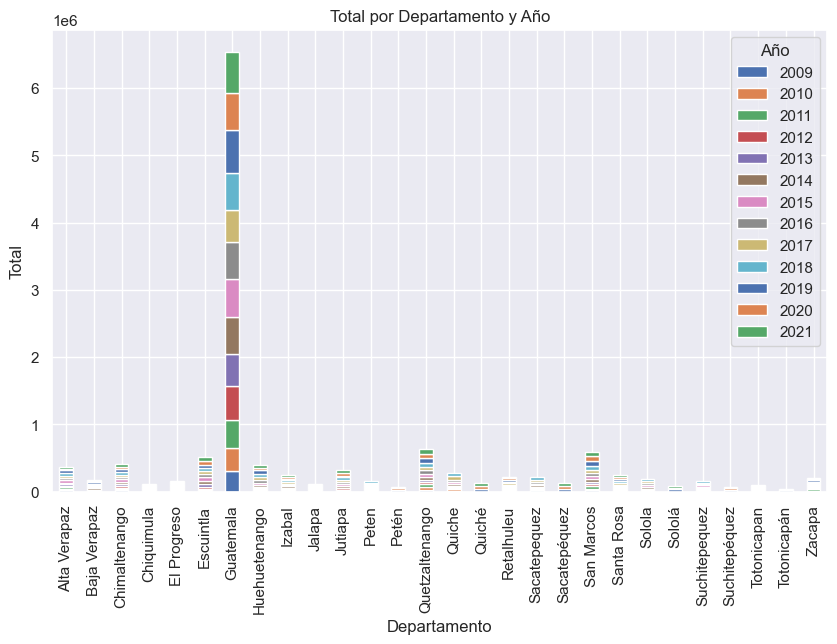

In [56]:
tabla = pd.pivot_table(servicios, values='Total', index='Departamento_residencia', columns='Año', aggfunc='sum')

# Graficar los resultados utilizando un gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Departamento')
plt.ylabel('Total')
plt.title('Total por Departamento y Año')
plt.show()

In [ ]:
tabla = pd.pivot_table(servicios, values='Total', index='Departamento_residencia', columns='Año', aggfunc='sum')

# Graficar los resultados utilizando un gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Departamento')
plt.ylabel('Total')
plt.title('Total por Departamento y Año')
plt.show()

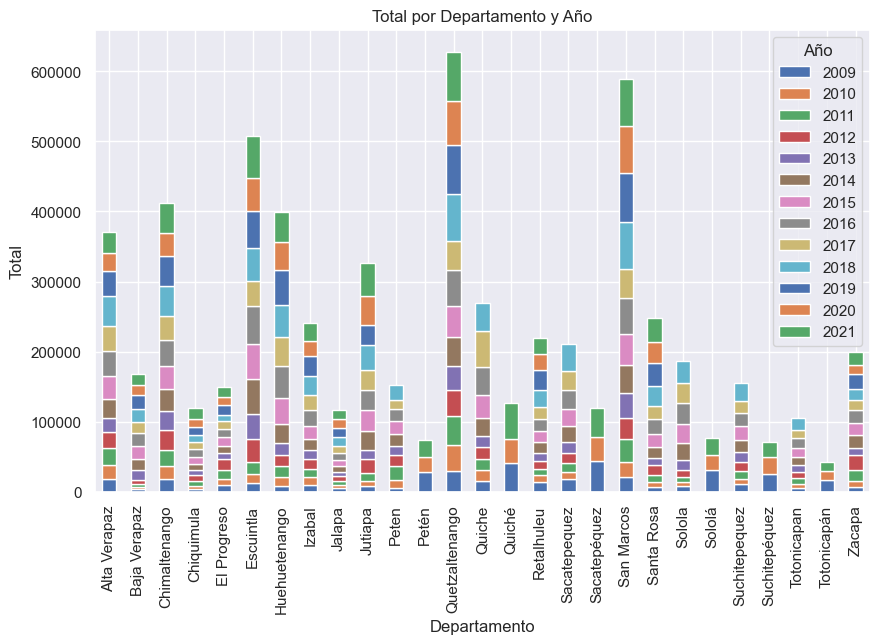

In [57]:
tabla = pd.pivot_table(servicios[servicios['Departamento_residencia'] != 'Guatemala'], values='Total', index='Departamento_residencia', columns='Año', aggfunc='sum')

# Graficar los resultados utilizando un gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Departamento')
plt.ylabel('Total')
plt.title('Total por Departamento y Año')
plt.show()